# Sui_Wenyu_HW1_report

## 1. Concept Questions

### 1.1

**Differnece:**  <br>
In the supervised learning model, we know the label of each data point in the training dataset. In the unsupervised learning model, we don't know the label of the data points.

**Benefit of supervised learning model:** Since the labels (groups) of the data points are already known, we can clearly know the target to predict (classify) in our model. This will contribute to more accurate and interpretable prediction result. <br>
**Drawback of supervised learning model:** Since the data points are already labeled in the training dataset, the model may generate a wrong prediction result if we feed the model with a new data point that doesn't belong to any labels (groups) in the training dataset.

**Benefit of unsupervised learning model:** Since the model make predictions (or classifications) purely based on the features of the data, it may discover some patterns that cannot be found by human. <br>
**Drawbacks of unsupervised learning model:** The actual labels (groups) of the data points are unknown. Therefore, the prediction results may be very different from reality.

### 1.2

Yes, different initialization may lead to different results for k-means. Since we are solving a non-convex problem, k-means may find local optimal solution instead of global optimal solution. Different initialization may lead to different local optimal solutions.

### 1.3

Since the sample size of the training data set is finite. There is always a finite number of ways to divide the data into k clusters. <br>
Since the k-means algorithm is always trying to minimize a metric, the target metric will always reach a minimum value after finite number of iterations. Therefore, the clusters generated by a k-means model will always converage.

### 1.4

The k-means algorithm uses Euclidian distance (L2 distance) as a measure of similairity. The target of the model is to minimize the sum of squared Euclidain distance between each data point and the centroid of its group. Whenever the algorithm makes adjustment to the centroiud of a group, it will set up a new centrold for the group in the way that the the sum squared Euclidian distance between the centroid and each data point within the same group is minimized. 

On the other hand, the generalized k-means algorithm may use different measure of similarity. The role of Euclidian distance in k-means model may be replaced by other measure of similarity in the generlaized k-means model.

The choice of different meausure of similarity will induce different geometry, and thus lead to different clustering results. <br>
For example, consider three 2-D vectors $O (0,0)$ , $A (4,3)$, $B (4,1)$. The distance of $OA$ and $OB$ can be measured as follows:

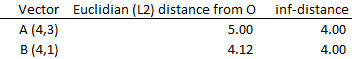

If we use Euclidian distance as the measure of similarity, we can see that vector $B$ is more similar to $O$ than vector $A$, since B has smaller Euclidian distance. (4.12 vs 5.00) However, if we choose inf-distance as  the measure of similarity, $A$ and $B$ will be equally similar to $O$ becuase their inf-distance from $O$ are the same. This differnce may lead to different cluster divisions in a k-means model.

### 1.5

The graph Laplacian matrix $L$ is hwon as follows:


$$L = \begin{bmatrix} 
2 & -1 & -1 & 0 & 0\\ 
-1 & 2 & -1 & 0 & 0\\ 
-1 & -1 & 2 & 0 & 0\\
0 & 0 & 0 & 1 & -1\\
0 & 0 & 0 & -1 & 1\\
\end{bmatrix}$$

The eigenvectors associated with zero eigenvalues are displayed as follows:

$$v^1 = \begin{bmatrix} 
-0.5774\\ 
-0.5774\\ 
-0.5774\\ 
0 \\
0 \\
\end{bmatrix}$$

$$v^2 = \begin{bmatrix} 
0\\ 
0\\ 
0\\ 
0.7071 \\
0.7071\\
\end{bmatrix}$$

If we put $v^1$ and $v^2$ into a new matrix $V$. it will look like:

$$V = \begin{bmatrix} 
-0.5774 & 0\\ 
-0.5774 & 0\\ 
-0.5774 & 0\\ 
0 & 0.7071\\
0 & 0.7071\\
\end{bmatrix}$$

in matrix $V$, we find that the first three rows are identical, and the 4th and 5th rows are also identical. Therefore, we can conclude that the nodes 1, 2 and 3 belong to the same cluster, while the nodes 4 and 5 belong to another cluster. There are 2 clusters in total. 

All the matrices and vectors mentioned abover are calculated using the following code:

In [1]:
# Import packages
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix, coo_matrix
import pandas as pd
from IPython.display import display
import time
import scipy.io as sio
from sklearn.cluster import KMeans
import functions  # self-defined package stored in the same folder as this notebook

# Trun off warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create adjacency matrix
A = np.array([[0,1,1,0,0],
              [1,0,1,0,0],
              [1,1,0,0,0],
              [0,0,0,0,1],
              [0,0,0,1,0]])

# Create degree matrix
D = np.diag(np.sum(A, axis=1))

# Create graph Laplacian matrix
L = D - A

print("Graph Laplacian matrix: \n")
print(L)

Graph Laplacian matrix: 

[[ 2 -1 -1  0  0]
 [-1  2 -1  0  0]
 [-1 -1  2  0  0]
 [ 0  0  0  1 -1]
 [ 0  0  0 -1  1]]


In [3]:
# Find eigenvalues and eigenvectors of graph Laplacian matrix
lambd, v = np.linalg.eig(L)

# find eigenvalue equal (or extremely close) to zero and corresponding eigenvectors
print("Eigenvectors associated with zero eigenvalues: \n")
idx = np.where(lambd <= 1e-100)[0]
print(np.round(v[:, idx],4))

Eigenvectors associated with zero eigenvalues: 

[[-0.5774  0.    ]
 [-0.5774  0.    ]
 [-0.5774  0.    ]
 [ 0.      0.7071]
 [ 0.      0.7071]]


## 2. Math of k-means clustering

### 2.1


$$ J = \sum_{i=1}^m \sum_{j=1}^k r^{ij} ||x^i - \mu^j||^2 $$
For Any give $j$, <br> <br>
$J  = \sum_{i=1}^m r^{ij}||x^i - \mu^j||^2 = \sum_{i=1}^m r^{ij} (x^i - \mu^j)^T(x^i - \mu^j) $<br><br>
$\space\space= \sum_{i=1}^m r^{ij} ({x^i}^Tx^i - {x^i}^T\mu^j - {\mu^j}^Tx^i + {\mu^j}^T\mu^j)$  <br><br>
$\space\space = \sum_{i=1}^m r^{ij}({x^i}^Tx^i - 2{x^i}^T\mu^j + {\mu^j}^T\mu^j$)

Therefore, $\frac{\partial{J}}{\partial{\mu^j}} = -\sum_{i=1}^m 2r^{ij}(x^i - \mu^j)$

Since $J$ is a minimized value, $\frac{\partial{J}}{\partial{\mu^j}} = 0$

Therefore, $-\sum_{i=1}^m 2r^{ij}(x^i - \mu^j) = 0$

Solving this equation, we get $ - \sum_{i=1}^mr^{ij}x^i +\mu^j\sum_{i=1}^mj^{ij} = 0$

Finally, we can get $\mu^j = \frac{\sum_{i=1}^mr^{ij}x^i}{\sum_{i=1}^mr^{ij}}$

### 2.2

$$ J = \sum_{i=1}^m \sum_{j=1}^k r^{ij} ||x^i - \mu^j||^2 $$

In the equation above, we know that $x^i$'s with different $i$ values are independent.  $r^{ij}$'s with different $i$ values are also independent. Therefore, for each value $i$, if we can find the assignment of $r^{ij}$ such that $ J^i =  \sum_{j=1}^k r^{ij} ||x^i - \mu^j||^2 $ is minimized, then the sum of $J^i$ , $ J = \sum_{i=1}^m J^i = \sum_{i=1}^m \sum_{j=1}^k r^{ij} ||x^i - \mu^j||^2 $ will also be minimized.

For each value $i$, $ J^i =  \sum_{j=1}^k r^{ij} ||x^i - \mu^j||^2 $ <br>
We know that $r^{ij} = 0 \space or \space1$ and $\sum_{j=1}^m =1$ (i.e. for each $i$, only one $r^{ij}$ equals one, while other $r^{ij}$'s equal zero.) <br>
Therefore, to miniumize $J^i$, we need to set $r^{ij} = 1$ where $j = argmin_{j=1,2...k}||x^i - \mu^j||^2$. Then we need to set $r^{ij}=0$ for all the other $j$'s. 

If we repeate the assignment process of $r^{ij}$ for each value $i$,  each $J^i$ will be minimized. Therefore, $J$ will also be minimized.

## 3. Image compression using clustering

### 3.1

The following chunks for python code performs the image compression algorithm using k-means on three pictures. These pictures can be found in the data folder of the submitted .zip file:
1. football.bmp
2. hestain.bmp
3. timduncan.jpg

For each picture, we start the k-means with random initialization centroids and test each $k$ value (number of clusters) between 2 to 6. For each $k$ value, we run the algorithm 30 times. Therefore, the algorithm is run by $3 \times 5 \times 30 = 450$ times in total. The time to converge and number of iterations of each execution of k-means will be recorded and stored in a pandas dataframe named "**results**". 
We also set up an objective function, which we want to minimize, for the k-means algorthm. It equals the square root of the sum squared Euclidian distance between each data point (pixel in the picture) and the centroid of its cluster after the k-means model has converged. It will look like the following if written in formula: 

$$obj = \sqrt{\sum_{i=1}^m d(x^i, c^{\pi(i)})^2}$$

where $m$ is the number of pixel in the picture. $d()$ represents the formula to calculate Euclidian distance between two points. $x^i$ represents the data of the $i$ th pixel in the picture. $c^{\pi(i)}$ represents the centriod of the cluster that the $i$ th pixel belongs to after the model has converged. 

Here we use this objective funtions as a measure of the image quality after the picture is compressed, since a smaller value of this functiuon means that the centroid of the clusters are closer to the original values of the pixels. In other words, the compressed picture will be more 'similar' to the origianl image if the objective function has a smaller value. Therefore, a smaller vlaue of the objective function means higher image quality. 

The last chunk of this section (3.1) will display the execution results of  k-means with the best image quality for each picture at each $k$ level.

In [4]:
# set up a dataframe to store all execution results of k means
# set up list of "Class" and "centroid" to store all the outputs from the k-means model
results = pd.DataFrame({"Picture":[],
                        "width": [],
                        "height": [],
                        "k":[],
                        "Time to Converge":[],
                        "Iterations":[],
                        "obj": []})
Class_list = []
centroid_list = []

# Define pictures to compress
pics = ['data/football.bmp', 'data/hestain.bmp', 'data/timduncan.jpg']

In [5]:
# compress each picture
for pic in pics:

    # read pixcel values of picture
    width, height, pixels = functions.read_image_pixels(pic)

    # define number of clusters  k = 2 to 6
    for k in range(2,7):
        
        # for each k, we try the process 30 times
        for i in range(30):
        # run k-means to compress the image
        # 'Class' and 'centroid' are defined in the homework requirement file
        # 'time_to_converge' represent how much time the centriod converge in the k-mmeans model
        # 'iterno' represents the number of iterations in k-means model
        # 'obj' represents the square root of the sum squared Euclidian distance between each data point and the centroid of its cluster
            Class, centroid, time_to_converge, iterno, obj = functions.k_means_compress(width, height, pixels, k = k)
            results = pd.concat([results,
                                 pd.DataFrame({"Picture": [pic],
                                               "width": [width],
                                               "height": [height],
                                               "k": [k],
                                               "Time to Converge": [time_to_converge],
                                               "Iterations": [iterno],
                                               "obj": [obj]})])
            Class_list += [Class]
            centroid_list  += [centroid]

In [6]:
# Display results of compressions 
results = results.reset_index(drop = True)                
display(results)

,Picture,width,height,k,Time to Converge,Iterations,obj
0,data/football.bmp,620.0,412.0,2.0,0.187373,21.0,35233.800632
1,data/football.bmp,620.0,412.0,2.0,0.182683,21.0,35233.800632
2,data/football.bmp,620.0,412.0,2.0,0.270874,31.0,35233.800632
3,data/football.bmp,620.0,412.0,2.0,0.260365,30.0,35233.800632
4,data/football.bmp,620.0,412.0,2.0,0.261012,30.0,35233.800632
...,...,...,...,...,...,...,...
445,data/timduncan.jpg,640.0,360.0,6.0,1.172818,63.0,13565.200994
446,data/timduncan.jpg,640.0,360.0,6.0,2.047481,114.0,13565.329631
447,data/timduncan.jpg,640.0,360.0,6.0,0.927528,57.0,13565.200994
448,data/timduncan.jpg,640.0,360.0,6.0,0.859059,53.0,13565.200994


,Picture,width,height,k,Time to Converge,Iterations,obj
0,data/football.bmp,620.0,412.0,2.0,0.187373,21.0,35233.800632
30,data/football.bmp,620.0,412.0,3.0,0.217945,21.0,25188.252242
62,data/football.bmp,620.0,412.0,4.0,0.282386,25.0,21689.109433
95,data/football.bmp,620.0,412.0,5.0,0.278232,22.0,19199.926042
122,data/football.bmp,620.0,412.0,6.0,0.522632,37.0,17544.540062
151,data/hestain.bmp,298.0,224.0,2.0,0.049017,23.0,13215.639296
180,data/hestain.bmp,298.0,224.0,3.0,0.082309,34.0,10030.610151
211,data/hestain.bmp,298.0,224.0,4.0,0.112003,41.0,8563.034509
240,data/hestain.bmp,298.0,224.0,5.0,0.073377,24.0,7529.118341
295,data/hestain.bmp,298.0,224.0,6.0,0.089581,25.0,6863.366011


Picture :  data/football.bmp
Height:  412  Width:  620  k:  2


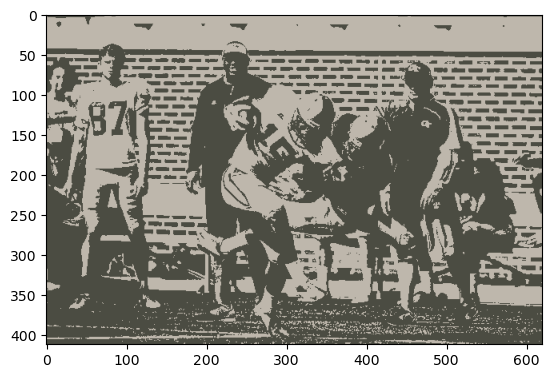

Picture :  data/football.bmp
Height:  412  Width:  620  k:  3


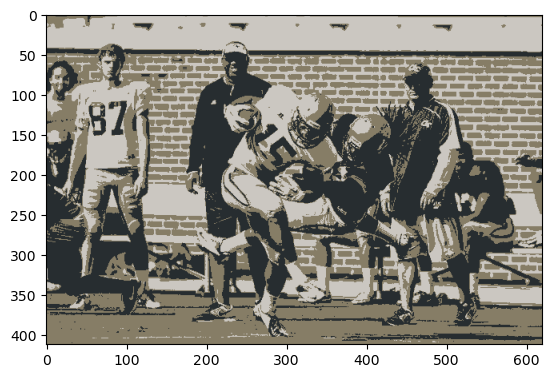

Picture :  data/football.bmp
Height:  412  Width:  620  k:  4


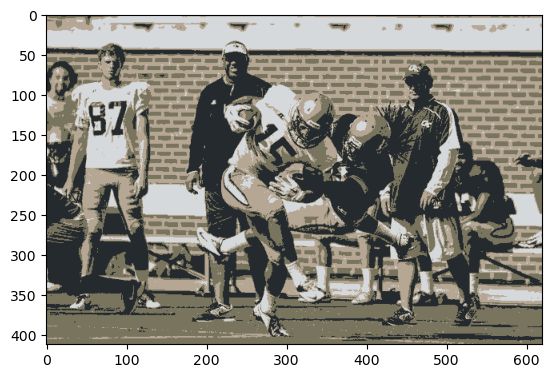

Picture :  data/football.bmp
Height:  412  Width:  620  k:  5


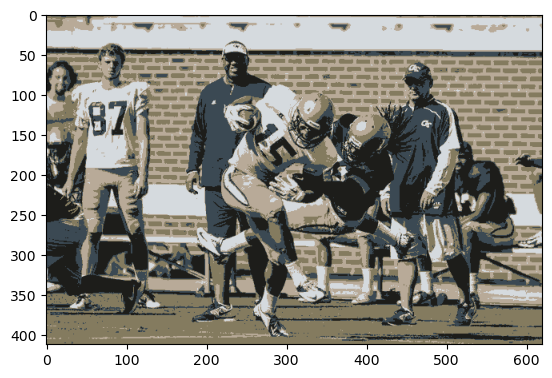

Picture :  data/football.bmp
Height:  412  Width:  620  k:  6


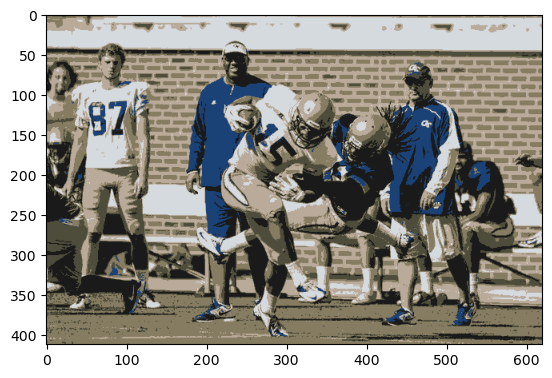

Picture :  data/hestain.bmp
Height:  224  Width:  298  k:  2


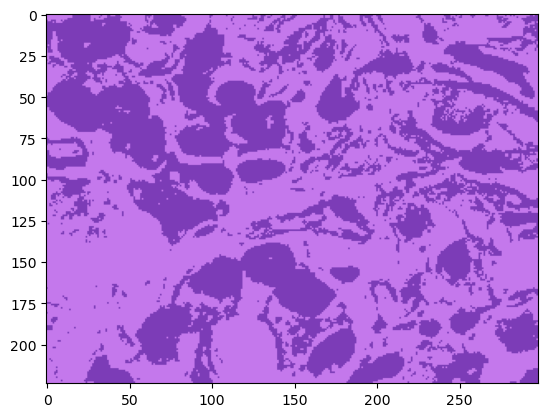

Picture :  data/hestain.bmp
Height:  224  Width:  298  k:  3


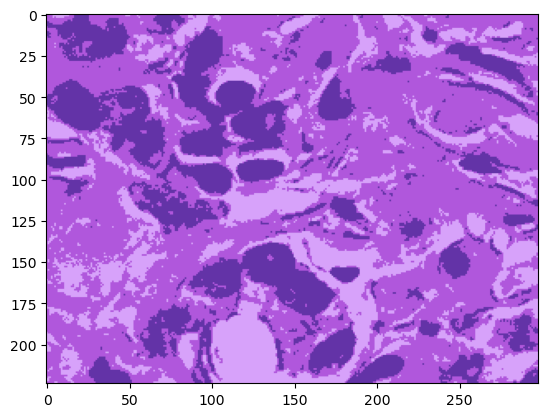

Picture :  data/hestain.bmp
Height:  224  Width:  298  k:  4


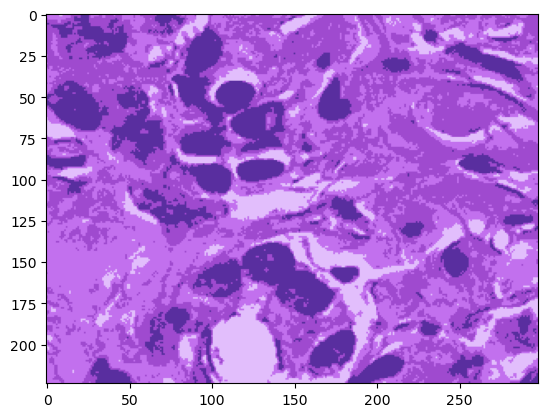

Picture :  data/hestain.bmp
Height:  224  Width:  298  k:  5


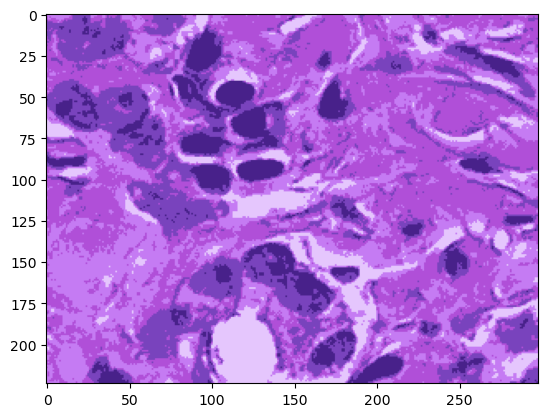

Picture :  data/hestain.bmp
Height:  224  Width:  298  k:  6


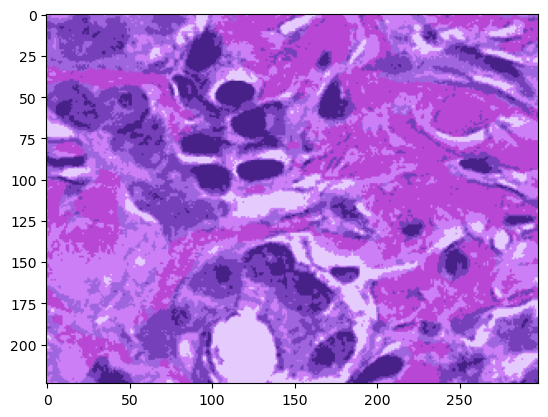

Picture :  data/timduncan.jpg
Height:  360  Width:  640  k:  2


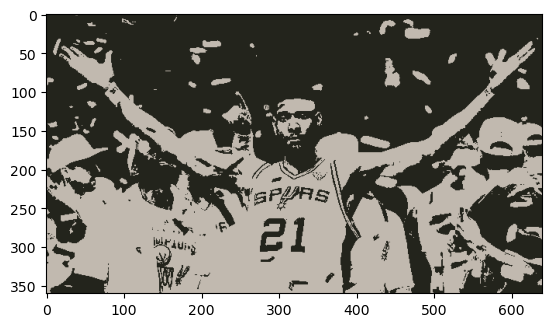

Picture :  data/timduncan.jpg
Height:  360  Width:  640  k:  3


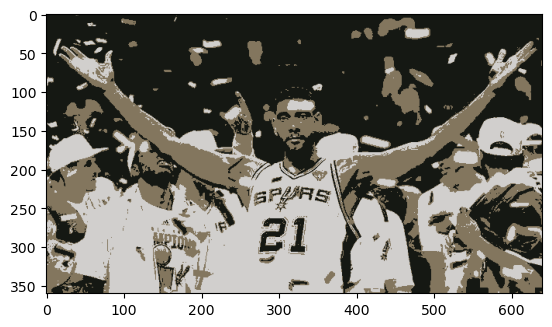

Picture :  data/timduncan.jpg
Height:  360  Width:  640  k:  4


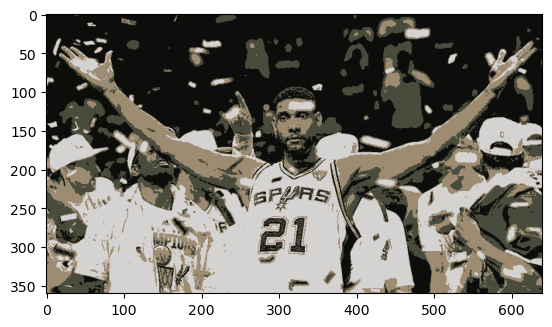

Picture :  data/timduncan.jpg
Height:  360  Width:  640  k:  5


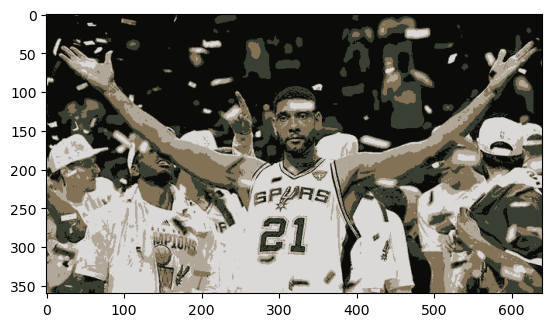

Picture :  data/timduncan.jpg
Height:  360  Width:  640  k:  6


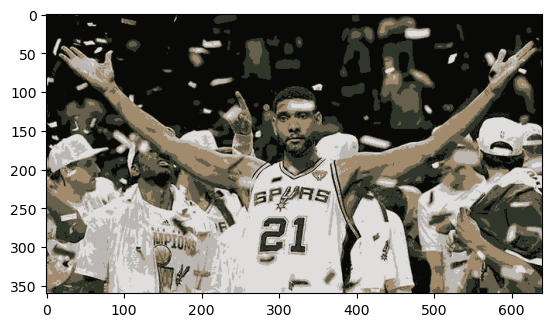

In [7]:
# Find the compression with minimum 'obj' value at each k level for each picture
best_result_index = results.groupby(["Picture", "k"]).idxmin() \
                                        .drop(columns = ['Time to Converge', 'Iterations'])
best_results = results.iloc[best_result_index['obj'], :]
display(best_results)

# display the pictures from the compressions with minimum 'obj' value at each k level for each picture
for i in range(best_results.shape[0]):
    picture = best_results["Picture"].tolist()[i]
    width = int(best_results['width'].tolist()[i])
    height = int(best_results['height'].tolist()[i])
    k = int(best_results['k'].tolist()[i])
    
    index = best_results.index.tolist()[i]
    Class = Class_list[index]
    centroid = centroid_list[index]
    
    print("Picture : ", picture)
    print("Height: ", height, " Width: ", width, " k: ", k)
    functions.display_compressed_image(width, height, k, Class, centroid)

### 3.2

As previously discussed, we run the algorithm 30 times at each $k$ level for each picture.

The table generated by the following chunk of code diplays the average time (in seconds), and average number of iterations for the k-means algorithm to converge at each $k$ level for each picture. Please find these two values in column "*Time to Converge*" and "*Iterations*". 

In [8]:
# Find the average 'Time to Converge', 'Iterations' and 'obj' for each image at each k level
avg_results = results.groupby(["Picture", "k"]).mean()

print("Average \'Time to Converge\', \'Iterations\' and \'obj\' for each image at each k level:")
display(avg_results)

Average 'Time to Converge', 'Iterations' and 'obj' for each image at each k level:


width  height  Time to Converge  Iterations  \
Picture            k                                                  
data/football.bmp  2.0  620.0   412.0          0.211768   23.966667   
                   3.0  620.0   412.0          0.201175   19.700000   
                   4.0  620.0   412.0          0.491723   42.733333   
                   5.0  620.0   412.0          0.454129   35.900000   
                   6.0  620.0   412.0          0.730584   51.600000   
data/hestain.bmp   2.0  298.0   224.0          0.059062   27.600000   
                   3.0  298.0   224.0          0.094568   38.166667   
                   4.0  298.0   224.0          0.135865   49.300000   
                   5.0  298.0   224.0          0.179595   58.200000   
                   6.0  298.0   224.0          0.184904   53.200000   
data/timduncan.jpg 2.0  640.0   360.0          0.100684   13.033333   
                   3.0  640.0   360.0          0.181312   20.400000   
                   4.0  640.0   360.0          0.343702   34.033333   
                   5.0  640.0   360.0          0.615234   53.633333   
                   6.0  640.0   360.0          0.953792   66.166667   

                                 obj  
Picture            k                  
data/football.bmp  2.0  35233.800632  
                   3.0  25188.252242  
                   4.0  22081.582568  
                   5.0  19199.934361  
                   6.0  17797.273395  
data/hestain.bmp   2.0  13216.270749  
                   3.0  10030.734636  
                   4.0   8563.071162  
                   5.0   7530.487924  
                   6.0   6877.283448  
data/timduncan.jpg 2.0  31223.788773  
                   3.0  21160.466828  
                   4.0  17382.515140  
                   5.0  15270.666751  
                   6.0  13695.523097

### 3.3

We choose to use "Elbow Mothod" to decide the best $k$ value for the k-means algorithm.<br>
*(reference: Elbow Method for optimal value of k in KMeans, https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)*

As discussed in question **3.1**, we defined an objective function to measure the quality of the image after compression. Our objective function is essentially the square root of the **within-cluster sum of squares (WCSS)**, and we would like this objective function to be minimized.

In the k-means model, the value of the objective function will almost always decrease as $k$ increases. However, a larger $k$ will also cost more computing power and memory space for the algorithm to run. Therefore, we need to find a 'best' $k$ that balances both the image quality and computation cost. 

In the Elbow Method, we first need to create line charts showing the relationship between the objective function and $k$. The line charts are displayed for each compressed picture in the code chunk below.

Next, we need to determine the $k$ value at the "elbow", in other words, the $k$ value after which the objective function starts decresing significant slowly as $k$ increases. It can be easily seen that $k =3$ is the "elbow" for ***football.bmp*** and ***hestain.bmp***. The elbow for ***timduncan.jpg"*** will be $k=4$.

To conculude, in general, either $k=3$ or $k=4$ can be the best $k$ value. I personally would choose $k=4$ since it has better image quality than $k=3$ and doesn't cost significantly more to compute.

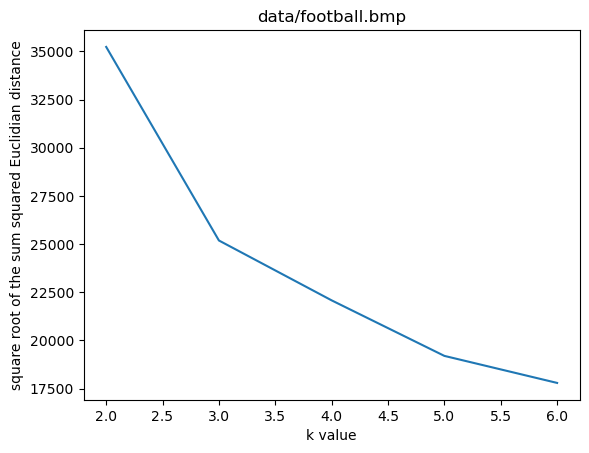

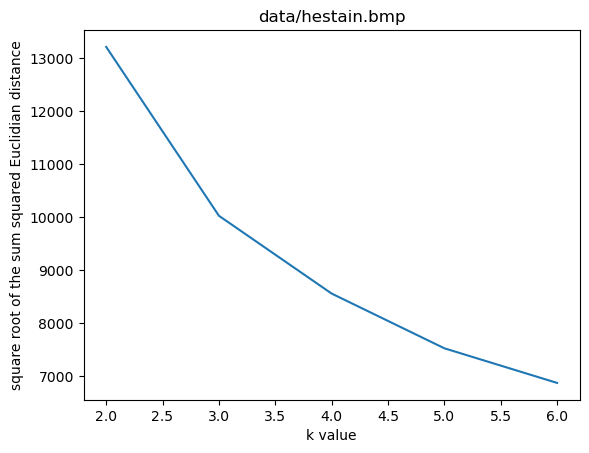

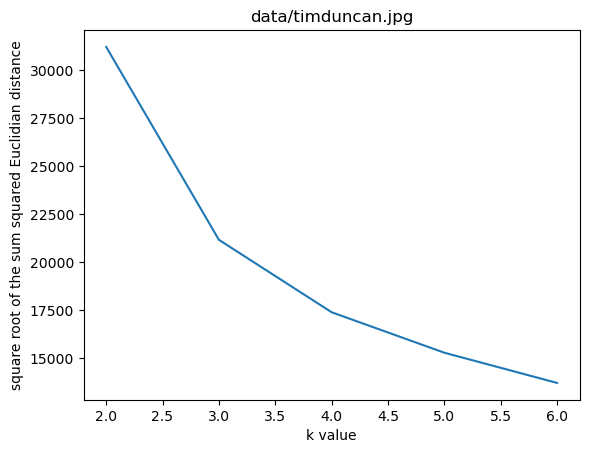

In [9]:
# display the average  'obj' value for each picture at different k level 
avg_results = avg_results.reset_index()

for picture in avg_results['Picture'].unique().tolist():
    k_list = avg_results[avg_results["Picture"] == picture]['k'].tolist()
    obj_list = avg_results[avg_results["Picture"] == picture]['obj'].tolist()
    
    plt.plot(k_list, obj_list)
    plt.xlabel("k value")
    plt.ylabel("square root of the sum squared Euclidian distance")
    plt.title(picture)
    plt.show()

## 4. MNIST Dataset clustering

### 4.1

The following chunks of code perform the k-means clustering algorithm (using squared $l2$ norm) to the MNIST data. Similar to what we did in **Question 3**, here we define a objective function which measures the performance of each execution of k-means model. The formula can be written as:
$$obj = \sqrt{\sum_{i=1}^m d(x^i, c^{\pi(i)})^2}$$

where $m$ is the number of data points. $d()$ represents the formula to calculate Euclidian distance (squared l2 norm) between two points. $x^i$ represents the $i$ th data points. $c^{\pi(i)}$ represents the centriod of the cluster that the $i$ th data point belongs to after the model has converged. 

Since the k-means model uses random initialization, the performance of the model is not stable. To obtain a satble performance, we run the model three times and choose the execution result with lowest $obj$ value as our final result. We could have run the model more times, but we choose to run only three times due to the constraint of computation power.

The purity score and the assigned class (number) of each cluster are displayed in the table generated in the following code chunks. As we can see, the purity score of some clusters are pretty low (less than 50%), which means the k-means algorithm may not correctly assign the data points belonging to these clusters into the right class. Also, as we found in many executions, more than one clusters are assigned to the same number (class), while no clusters are assigned to other numbers. This means the k-means model may not successfully distinguish the data points belonging to these numbers. These data points are mixed with each other and assigned to different clusters in a wrong way. 

The overall purity score among all  the data points is also not very high. Here we define the overall purity score equals the total number of correctly assigned data points divided by the number of all data points.

Generally speaking, the k-means clustering algorithm (using squared $l2$ norm) is not performing very well to classify the MNIST data.

In [10]:
# load MNIST data
matFile = sio.loadmat('./data/mnist_10digits')
xtrain = matFile['xtrain']
ytrain = matFile['ytrain']
xtest = matFile['xtest']
ytest = matFile['ytest']

# Concatenate the training and testing data
x = np.concatenate((xtrain, xtest))
y = np.concatenate((ytrain, ytest), axis = 1)

# standardize the features
x_std = x/255

In [11]:
# run k-means model (using squared l2 norm) to classify the data points in 'xtrain_std'
# run the algorithm 3 times and choose the run with the smallest objective value as the final result
# 'Class' stores the class index of each data point
# 'xcentroid_std' stores the standardized features of the centroid of each class
obj_MNIST_list = []
Class_MNIST_list =[]
x_centroid_std_list = []

for i in range(3):
    Class, xcentroid_std, obj = (functions.k_means_MNIST_l2(x_std,10))
    obj_MNIST_list += [obj]
    Class_MNIST_list += [Class]
    x_centroid_std_list += [xcentroid_std]

# find the execution with the best performance
idx = np.argmin(obj_MNIST_list)
Class = Class_MNIST_list[idx]
xcentroid_std = x_centroid_std_list[idx]

In [12]:
# identify the true class and purity for each class
# the class of a cluster will be the true 'y' value that appears most time in the class

assigned_class, correctly_assigned, true_counts, purities = functions.MNIST_true_labels_and_purity(Class, y)

MNIST_result_l2 = pd.DataFrame({'assigned class': assigned_class, 'Correctly Assigned': correctly_assigned, 
                                                              "True Counts": true_counts, 'purity': purities,})
print("Purity score and assigned label of each cluster: ")
display(MNIST_result_l2)

print("Overall Purity: ")
print(np.sum(correctly_assigned) / np.sum(true_counts))

print("Count of assigned numbers:")
print(len(set(assigned_class)))

Purity score and assigned label of each cluster: 


,assigned class,Correctly Assigned,True Counts,purity
0,2,4909,5470,0.897441
1,9,2894,8352,0.346504
2,7,3170,7697,0.411849
3,0,5503,5867,0.937958
4,8,3651,8328,0.438401
5,1,3457,6096,0.567093
6,4,2604,6243,0.417107
7,6,5527,6420,0.860903
8,1,4364,6408,0.681024
9,3,4570,9119,0.501151


Overall Purity: 
0.5807
Count of assigned numbers:
9


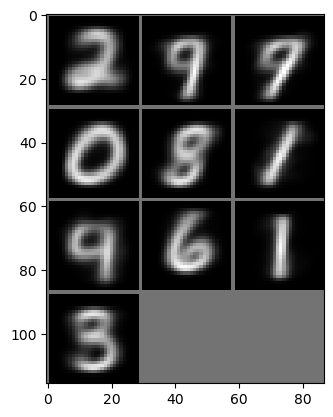

In [13]:
# print out the image of the centroid of each custer
functions.show_NIST_image_function(xcentroid_std[:,:]*255, 28,28)

### 4.2

The following chunks of code perform the k-means clustering algorithm (using squared $l1$ norm) to the MNIST data. Here we define a objective function different from that in last question **(4.2)** to measure the performance of each execution of k-means model:
$$obj = \sum_{i=1}^m d(x^i, c^{\pi(i)})^2$$
where $m$ is the number of data points. $d()$ represents the formula to calculate Manhattan distance ($l1$ distance) between two points. $x^i$ represents the $i$ th data points. $c^{\pi(i)}$ represents the centriod of the cluster that the $i$ th data point belongs to after the model has converged. 

Same as last question, we run the model 3 times and choose the execution with the smallest objetcive function value as the final result.

The purity score and the assigned class (number) of each cluster are displayed in the table generated in the following code chunks. As we can see, the purity score of some clusters are pretty low (less than 50%). Also, in many times of executions, more than one clusters are assigned to the same number (class), while no clusters are assigned to other numbers. These findings are the same as what we see in the last question. 

The overall purity score among all clustters is slightly lower (but not significantly different) from the result of last question using $l2$ distance.
However, as we noticed in many times of executions, the k-means model with $l2$ distance often has one more assigned number than the model using $l1$ distance. This means the model using $l2$ distance can correctly identify one more number than the model using $l1$ distance. Therefore, $l2$ distance is the metric that gives better result.

In [14]:
# run k-means model (using l1 norm) to classify the data points in 'xtrain_std'
# run the algorithm 3 times and choose the run with the smallest objective value as the final result
# 'Class' stores the class index of each data point
# 'xcentroid_std' stores the standardized features of the centroid of each class
obj_MNIST_list = []
Class_MNIST_list =[]
x_centroid_std_list = []

for i in range(3):
    Class, xcentroid_std, obj = (functions.k_means_MNIST_l1(x_std,10))
    obj_MNIST_list += [obj]
    Class_MNIST_list += [Class]
    x_centroid_std_list += [xcentroid_std]

# find the execution with the best performance
idx = np.argmin(obj_MNIST_list)
Class = Class_MNIST_list[idx]
xcentroid_std = x_centroid_std_list[idx]

In [15]:
# identify the true class and purity for each class
# the class of a cluster will be the true 'y' value that appears most time in the class

assigned_class, correctly_assigned, true_counts, purities = functions.MNIST_true_labels_and_purity(Class, y)

MNIST_result_l1 = pd.DataFrame({'assigned class': assigned_class, 'Correctly Assigned': correctly_assigned, 
                                                              "True Counts": true_counts, 'purity': purities,})
print("Purity score and assigned label of each cluster: ")
display(MNIST_result_l1)

print("Overall Purity: ")
print(np.sum(correctly_assigned) / np.sum(true_counts))

print("Count of assigned numbers:")
print(len(set(assigned_class)))

Purity score and assigned label of each cluster: 


,assigned class,Correctly Assigned,True Counts,purity
0,1,3506,7442,0.471110
1,6,1991,5018,0.396772
2,2,3585,4129,0.868249
3,0,4398,4716,0.932570
4,1,4328,10792,0.401038
5,8,2993,7574,0.395168
6,7,5677,7846,0.723553
7,4,4869,9262,0.525696
8,6,3487,4021,0.867197
9,3,4889,9200,0.531413


Overall Purity: 
0.5674714285714286
Count of assigned numbers:
8


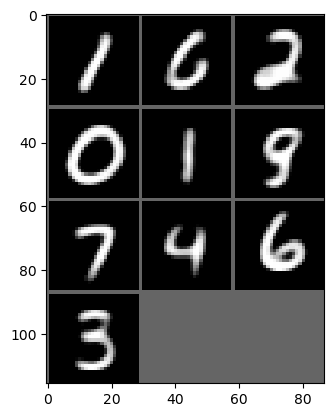

In [16]:
# print out the image of the centroid of each custer
functions.show_NIST_image_function(xcentroid_std[:,:]*255, 28,28)

## 5. Political blogs dataset

### 5.1

The following code chunk performs spectral clustering on the dataset of political blogs network, using the number of clusters $k = 2, 5, 10 \space and \space 25$.
It also displays the mismatch rate of each cluster at each level of $k$. 

Each one of the following tables shows the clustering result with one $k$ value. Each row in the table represents one cluster. The majority label of each cluster can be found in column "**assigned class**". The number of correctly assigned nodes can be found in column "**Correctly Assigned**". The number of incorrectly assigned nodes (mismatches) can be found in column "**Incorrectly Assigned**". The mismatch rate of each cluster can be found in column "**Mismatch Rate**".

In [17]:
# read edges, indice of the nodes equal original indices -1
a = functions.political_read_edges("data\edges.txt")
a -= 1

# read blog info, indice of the nodes equal original indices -1
indices, urls, orientations = functions.political_read_blog_info("data/nodes.txt")
indices = [int(i)-1 for i in indices]
indices = np.array(indices)
urls = np.array(urls)
orientations = np.array(orientations)

n = len(indices)

# create adjacency matrix
i = a[:, 0]
j = a[:, 1]

A = np.zeros(shape = (n,n), dtype = int)
for idx in range(len(i)):
    A[i[idx], j[idx]] = 1
    A[j[idx], i[idx]] = 1

# remove isolated nodes
iso_idx = np.where(np.sum(A, axis=1) == 0)[0]
A = np.delete(A, iso_idx, axis = 0)
A = np.delete(A, iso_idx, axis = 1)

indices = np.delete(indices, iso_idx)
urls = np.delete(urls, iso_idx)
orientations = np.delete(orientations, -iso_idx)

# Create degree matrix and Laplacian matrix
D = np.diag(np.sum(A, axis=1))
L = D - A

# calculate eigen values and eigenvectors of Laplacian matrix
lambd, v = np.linalg.eig(L)
idx = lambd.argsort()
v = v[:, idx]

#find K minimal eigenvalues
for K in [2, 5, 10, 25]:
    x = v[:, 0:K].real

    # standardize the values in each row of matrix x
    x = x / np.repeat(np.sqrt(np.sum(x * x, axis=1).reshape(-1, 1)), K, axis=1)
    kmeans = KMeans(n_clusters=K).fit(x)
    idx = kmeans.labels_
    
    # identify the mismatch rate  each cluster
    # the label of a cluster will be the true 'y' value that appears most time in the class
    assigned_class, correctly_assigned, incorrectly_assigned, true_counts, mismatch_rates = \
        functions.political_true_labels_and_purity(idx , orientations, K)

    political_result = pd.DataFrame({'assigned class': assigned_class, 'Correctly Assigned': correctly_assigned,
                                 'Incorrectly Assigned': incorrectly_assigned, "True Counts": true_counts,
                                 'Mismatch Rate': mismatch_rates})
    print("Mismatch rate of each cluster, K = ", K)
    display(political_result)

    print("Overall Mismatch Rate: ")
    print(1 - np.sum(correctly_assigned) / np.sum(true_counts))
    print("\n")

Mismatch rate of each cluster, K =  2


,assigned class,Correctly Assigned,Incorrectly Assigned,True Counts,Mismatch Rate
0,0,652,570,1222,0.466448
1,0,2,0,2,0.000000


Overall Mismatch Rate: 
0.46568627450980393


Mismatch rate of each cluster, K =  5


,assigned class,Correctly Assigned,Incorrectly Assigned,True Counts,Mismatch Rate
0,0,643,567,1210,0.468595
1,1,2,1,3,0.333333
2,0,4,1,5,0.200000
3,0,4,0,4,0.000000
4,0,2,0,2,0.000000


Overall Mismatch Rate: 
0.46486928104575165


Mismatch rate of each cluster, K =  10


,assigned class,Correctly Assigned,Incorrectly Assigned,True Counts,Mismatch Rate
0,0,596,522,1118,0.466905
1,0,14,0,14,0.000000
2,0,5,0,5,0.000000
3,0,4,1,5,0.200000
4,1,40,21,61,0.344262
5,0,2,0,2,0.000000
6,0,2,2,4,0.500000
7,0,7,3,10,0.300000
8,1,2,1,3,0.333333
9,0,2,0,2,0.000000


Overall Mismatch Rate: 
0.44934640522875813


Mismatch rate of each cluster, K =  25


,assigned class,Correctly Assigned,Incorrectly Assigned,True Counts,Mismatch Rate
0,1,470,73,543,0.134438
1,0,52,2,54,0.037037
2,0,447,12,459,0.026144
3,1,18,2,20,0.100000
4,0,8,4,12,0.333333
5,0,4,1,5,0.200000
6,1,2,1,3,0.333333
7,0,3,1,4,0.250000
8,0,12,0,12,0.000000
9,0,3,0,3,0.000000


Overall Mismatch Rate: 
0.08986928104575165




### 5.2

The following code chunk performs the same spectral clustering algorithm as last question, but using more k values. We will compare the overall mismatch rate of all the nodes at different $k$ levels. The overall mismatch rate is defined as the total number of incorrectly assigned nodes divided by the total number of all nodes. The results are displayed in the following table and line chart.

As we can observe from the table and line chart, the overall mismatch rate stays stable as $k$ increases from 2 to 14. Then it decreses rapidly as $k$ increases to 15. (It equals $11\%$ when $k=15$.)Then it decreases pretty slowly after $k$ gets larger than 15. If we keep increasing the value of $k$, we can get an overall mismatch rate of $0.00\%$ when $k=1224$ . Here, 1224 is the total number of non-isolated nodes, which means we cannot further increase the value of $k$.

From these findings above, we may figure that in this political blog network, most of the blogs can be included in 15 major communities. Setting $k=15$ will be able to achieve a reasonably small mismatch rate. Meanwhile, the rest (about 11%) of the blogs are not connected to many other blogs, so they can not be divided into any major communities.

,K,Overall Mismatch Rate
0,2,0.465686
1,3,0.465686
2,4,0.464869
3,5,0.464869
4,6,0.464869
5,7,0.464869
6,8,0.463235
7,9,0.463235
8,10,0.449346
9,11,0.450980


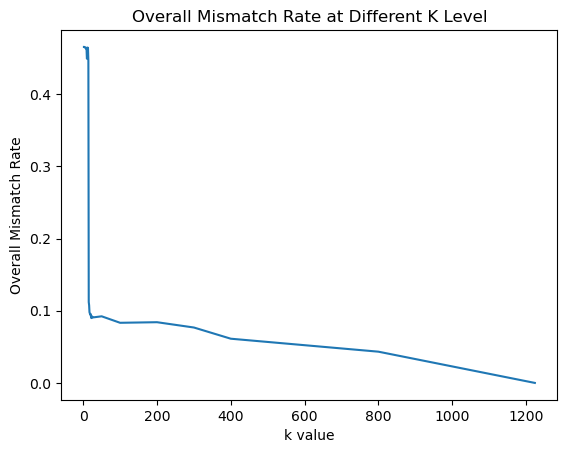

In [18]:
#find K minimal eigenvalues
k_values = list(range(2, 25)) + [25, 50, 100, 200, 300, 400, 800, 1200, 1224]
Overall_Mimatch_Rate = []

for K in k_values:
    x = v[:, 0:K].real

    # standardize the values in each row of matrix x
    x = x / np.repeat(np.sqrt(np.sum(x * x, axis=1).reshape(-1, 1)), K, axis=1)
    kmeans = KMeans(n_clusters=K).fit(x)
    idx = kmeans.labels_
    
    # identify the mismatch rate  each cluster
    # the label of a cluster will be the true 'y' value that appears most time in the class
    assigned_class, correctly_assigned, incorrectly_assigned, true_counts, mismatch_rates = \
        functions.political_true_labels_and_purity(idx , orientations, K)

    Overall_Mimatch_Rate += [1 - np.sum(correctly_assigned) / np.sum(true_counts)]

results = pd.DataFrame({"K": k_values,
                                            "Overall Mismatch Rate": Overall_Mimatch_Rate })
display(results)

plt.plot(k_values, Overall_Mimatch_Rate)
plt.xlabel("k value")
plt.ylabel("Overall Mismatch Rate")
plt.title("Overall Mismatch Rate at Different K Level")
plt.show()